In [623]:
import wfdb
import mne
import numpy as np

record_path = "Desktop/PSG data/slp01a"

record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'st')

annotation_mne = mne.Annotations(
    onset=annotation.sample / record.fs,
    duration=30,
    description=annotation.aux_note
)

signals = record.p_signal  # Signal data as NumPy array
sampling_rate = record.fs  # Sampling frequency (e.g., 250 Hz)
channel_names = record.sig_name  # Channel names

# Define channel types (all 'misc' by default; adjust based on signal type)
channel_types = ["eeg" if "EEG" in ch else "misc" for ch in channel_names]

# Create MNE Info object
info = mne.create_info(
    ch_names=channel_names,
    sfreq=sampling_rate,
    ch_types=channel_types
)

# Convert signals to MNE RawArray
raw = mne.io.RawArray(signals.T, info)

# Add annotations to the raw object
raw.set_annotations(annotation_mne)

Creating RawArray with float64 data, n_channels=4, n_times=1800000
    Range : 0 ... 1799999 =      0.000 ...  7199.996 secs
Ready.


<RawArray | 4 x 1800000 (7200.0 s), ~54.9 MiB, data loaded>

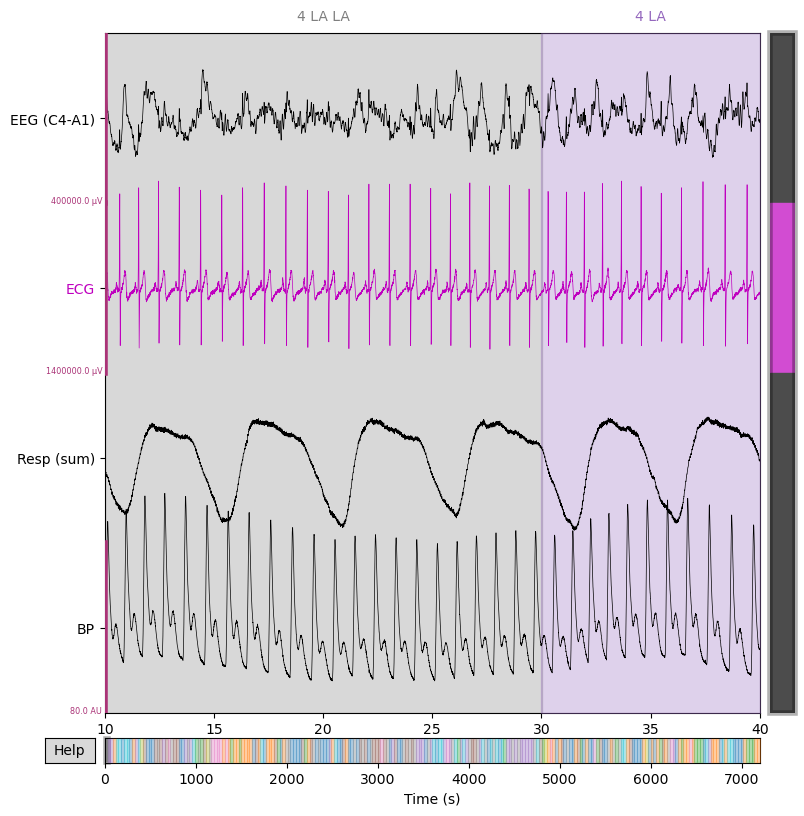

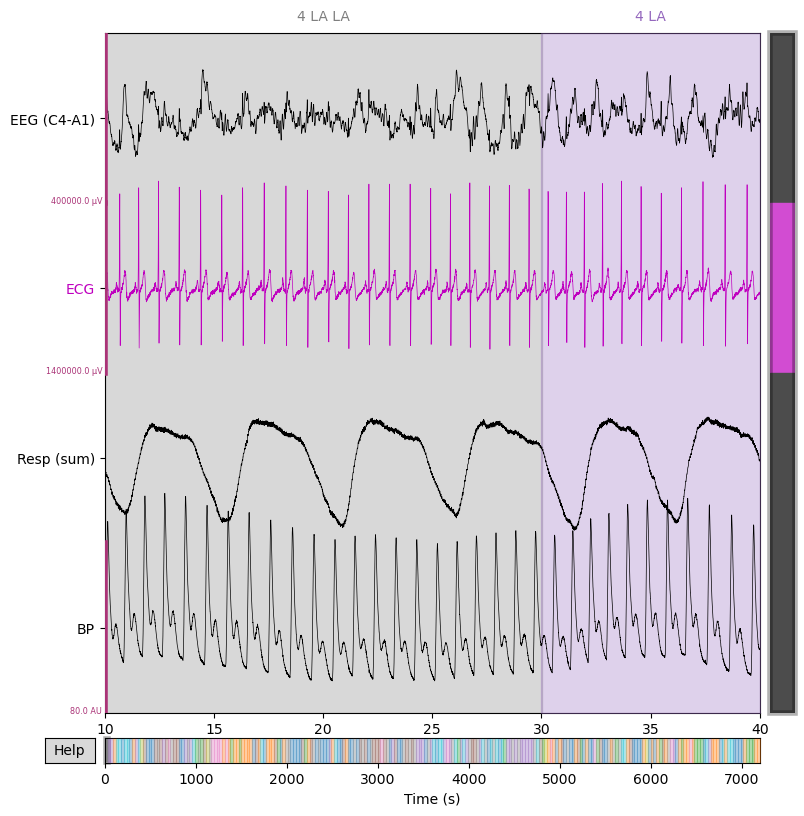

In [621]:
raw.set_channel_types({"ECG":"ecg","Resp (sum)": "resp","BP":"misc"})
# Plot raw data with dynamic scaling and exclude BP
raw.plot(start=10,duration=30,
    picks=["ECG",'Resp (sum)',"EEG (C4-A1)","BP"],
    scalings=dict(eeg=0.2,  ecg=0.7, resp=1,misc=40),
    title="PSG Data Excluding BP")

In [577]:
annotation = wfdb.rdann(record_path, 'st')

# Inspect the annotation object
print("Samples (Onsets in samples):", annotation.sample)
print("Auxiliary Notes (Descriptions):", annotation.aux_note)
print("Annotation Symbols:", annotation.symbol)
print("Subtypes:", annotation.subtype)
print("Channel Names:", annotation.chan)
print("Number of Annotations:", len(annotation.sample))

Samples (Onsets in samples): [      1    7500   15000   22500   30000   37500   45000   52500   60000
   67500   75000   82500   90000   97500  105000  112500  120000  127500
  135000  142500  150000  157500  165000  172500  180000  187500  195000
  202500  210000  217500  225000  232500  240000  247500  255000  262500
  270000  277500  285000  292500  300000  307500  315000  322500  330000
  337500  345000  352500  360000  367500  375000  382500  390000  397500
  405000  412500  420000  427500  435000  442500  450000  457500  465000
  472500  480000  487500  495000  502500  510000  517500  525000  532500
  540000  547500  555000  562500  570000  577500  585000  592500  600000
  607500  615000  622500  630000  637500  645000  652500  660000  667500
  675000  682500  690000  697500  705000  712500  720000  727500  735000
  742500  750000  757500  765000  772500  780000  787500  795000  802500
  810000  817500  825000  832500  840000  847500  855000  862500  870000
  877500  885000  8925

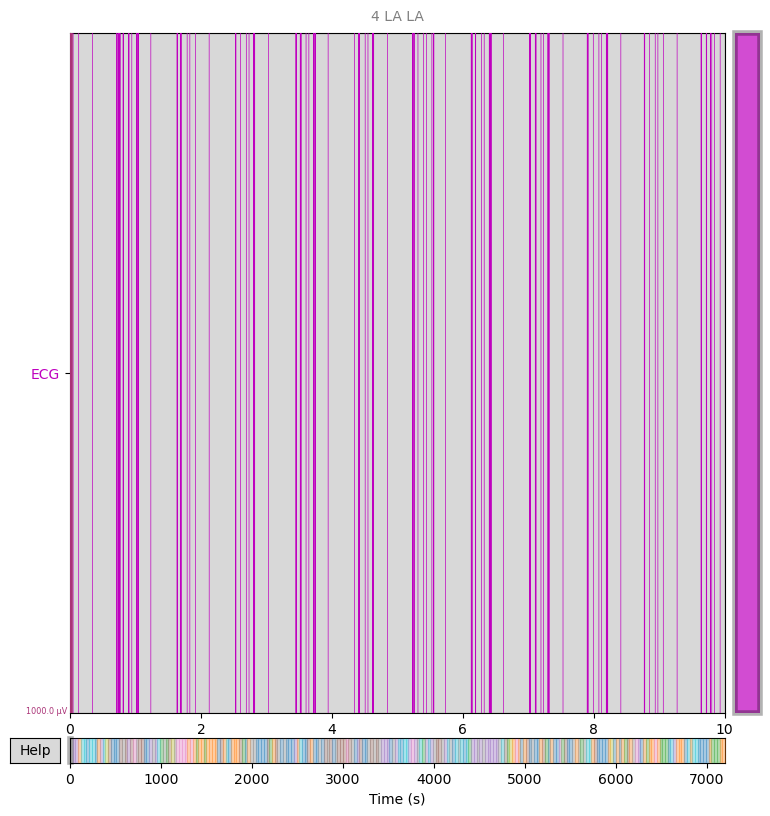

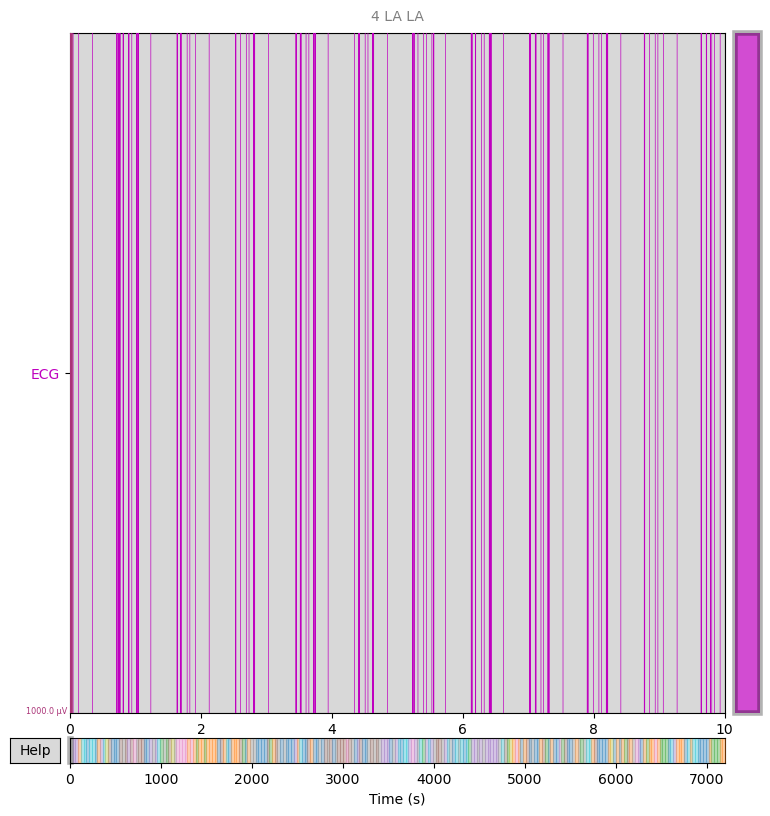

In [615]:
raw.plot(picks="ECG")

In [417]:
from mne.decoding import Scaler
from mne import io

# Initialize the Scaler
scaler = Scaler(info=raw.info)  # Use raw.info to define channel scaling rules

# Extract the raw data
raw_data = raw.get_data()  # Shape: (n_channels, n_samples)

# Transpose the data to match Scaler's expected input
scaled_data = scaler.fit_transform(raw_data.T).T  # Transform and transpose back

# Create a temporary RawArray with the scaled data
raw_scaled = io.RawArray(scaled_data, raw.info)  # Use the original raw.info

# Exclude the BP channel
channels_to_plot = [ch for ch in raw_scaled.ch_names if ch != "BP"]

# Plot the scaled data
raw_scaled.plot(picks=channels_to_plot, title="Scaled PSG Data Excluding BP")

ValueError: info had 1 data channels but X has 1800000 channels